# Regresión lógística binomial

[Curso de Regresión Logística con Python y scikit-learn](https://platiz.com/reglog)

# Preprocesamiento de los datos

*   Eliminar duplicados
*   Evaluar valores nulos
*   Remover columnas innecesarias
*   Procesar datos categóricos
*   Remover outliers
*   Escalar data

## Carga de datos

In [1]:
#Importamos las librerias necesarias para crear el modelo de regresion logistica
import pandas as pd 
import numpy as np

In [2]:
#Cargar el archivo csv de la carpeta data del proyecto
df_data = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Mostrar la informacion del dataframe  para identificar los tipos de datos y valores nulos
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Cambiar total_charges a numeric

In [5]:
#Convertir la columna TotalCharges a tipo numerico, forzando los errores a NaN
df_data.TotalCharges = pd.to_numeric(df_data.TotalCharges, errors='coerce')

In [6]:
#Mostrar nuevamente la informacion del dataframe para verificar el cambio de tipo de dato
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Manejo de datos nulos

In [7]:
#Verificar si hay valores nulos en el dataframe
df_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
#Mostrar el tamaño del dataframe
df_data.shape

(7043, 21)

In [9]:
#Eliminar las filas con valores nulos
df_data.dropna(inplace=True)

In [10]:
#Verificar el tamaño del dataframe despues de eliminar los valores nulos
df_data.shape

(7032, 21)

In [11]:
#Mostrar nuevamente la informacion del dataframe para verificar el cambio de tipo de dato
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

#Eliminar variables que no requerimos

## Eliminar id

In [12]:
#Mostrar las primeras 5 filas del dataframe
df_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [14]:
#Eliminar la columna customerID ya que no aporta informacion relevante para el modelo
df_data.drop('customerID',axis=1,inplace=True)

In [15]:
#Mostrar nuevamente la informacion del dataframe sin la columna customerID
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

## Convertir a numérico variable objetivo

In [16]:
#Convertir la columna Churn a valores binarios 1 y 0
#df_data['Churn'].replace(to_replace='Yes', value = 1, inplace=True)
#df_data['Churn'].replace(to_replace='No', value = 0, inplace=True)

# Convertir la columna 'Churn' a valores binarios 1 y 0
df_data['Churn'] = df_data['Churn'].replace({'Yes': 1, 'No': 0})


/tmp/ipykernel_5988/3169078771.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_data['Churn'] = df_data['Churn'].replace({'Yes': 1, 'No': 0})


In [17]:
#Verificar que la columna Churn se haya convertido correctamente
df_data['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [18]:
#Crear una copia del dataframe original para realizar el procesamiento de datos
df_data_processing = df_data.copy()

## Manejo de variables categóricas

In [19]:
#Convertir las variables categoricas a variables dummys usando One Hot Encoding

df_data_processing = pd.get_dummies(df_data_processing, dtype=int)
df_data_processing.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


## Analisis de correlación

In [20]:
#Importar la libreria para graficar
import matplotlib.pyplot as plt

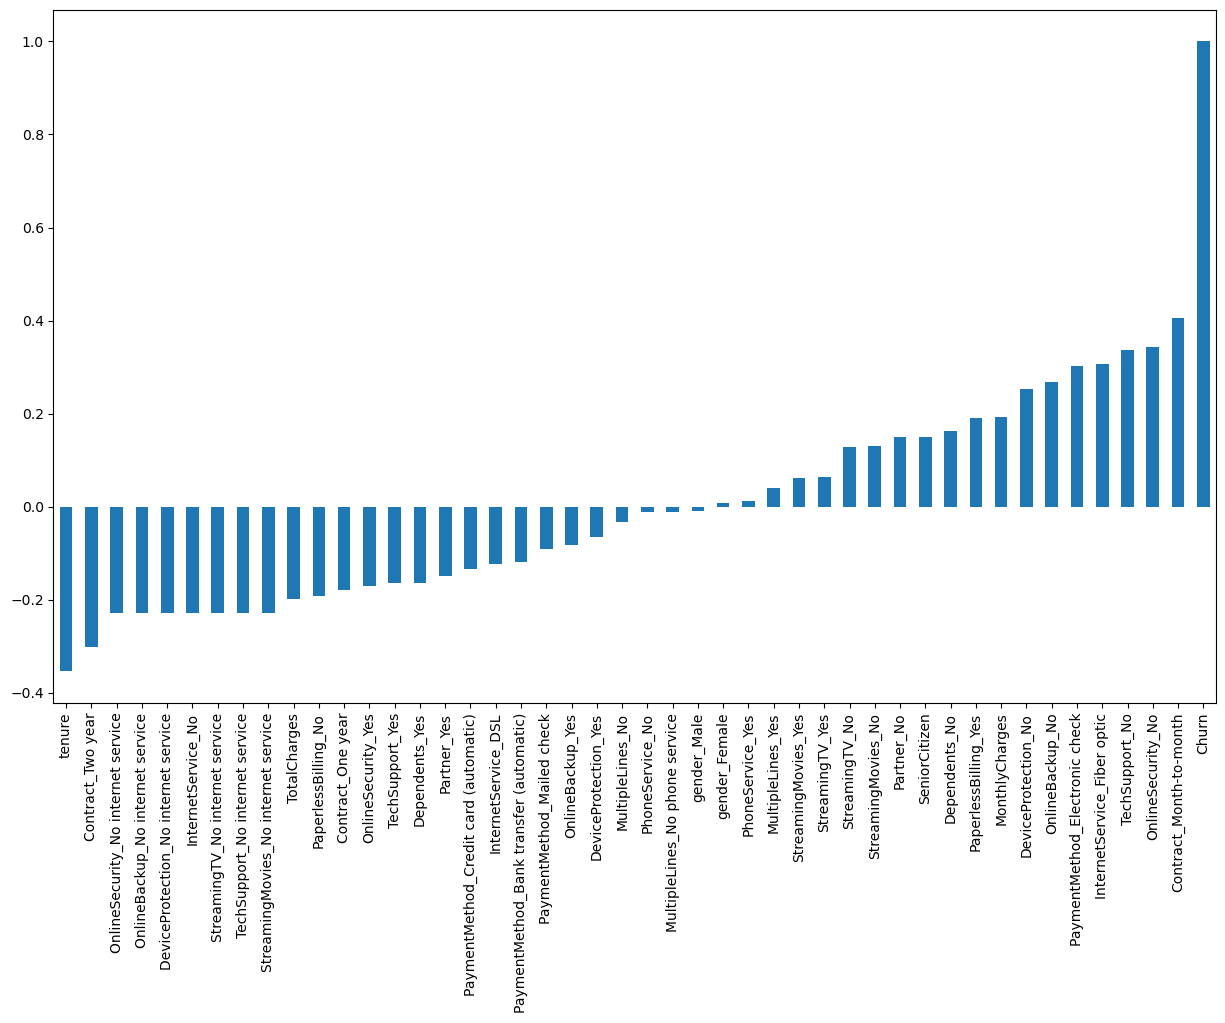

In [21]:
#Graficar la correlacion de las variables con la variable objetivo Churn
fig = plt.figure(figsize=(15,9))
df_data_processing.corr()['Churn'].sort_values(ascending=True).plot(kind='bar')
plt.show()

## Escalabilidad de los datos

In [22]:
#Importar la libreria para escalar los datos
from sklearn.preprocessing import MinMaxScaler

In [23]:
#Escalar los datos entre 0 y 1 usando MinMaxScaler
scaler = MinMaxScaler()
df_data_processing_scaled =  scaler.fit_transform(df_data_processing)

In [24]:
#Convertir el resultado a un dataframe
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled)

In [25]:
#Asignar los nombres de las columnas originales al dataframe escalado
df_data_processing_scaled.columns = df_data_processing.columns

In [26]:
#Mostrar las primeras 5 filas del dataframe escalado
df_data_processing_scaled.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Análisis exploratorio de datos

In [ ]:
#Importar la libreria seaborn para graficar
import seaborn as sns

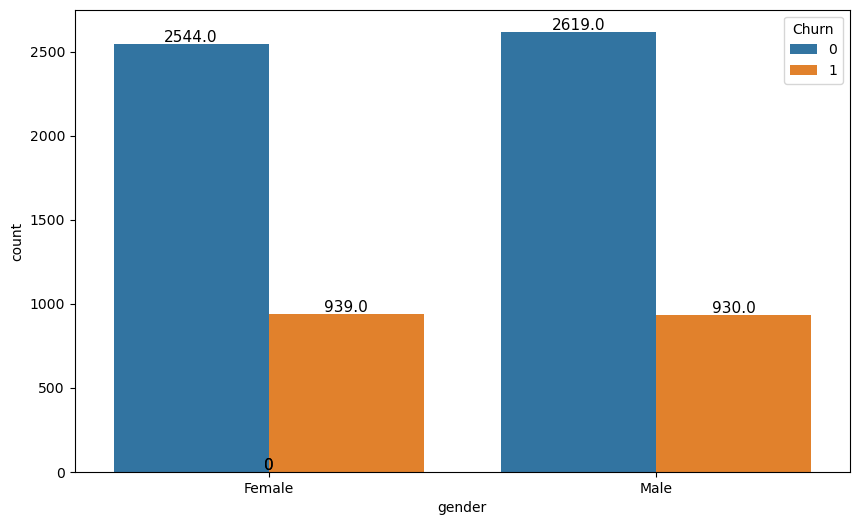

In [ ]:
#Graficar la distribucion de la variable genero con respecto a la variable objetivo Churn
plt.figure(figsize=(10,6))
sns.countplot(data=df_data, x='gender',hue='Churn')
#Esta linea muestra el valor de cada barra sobre la barra
#Usamos plt.gca().patches para obtener las barras de la grafica
#gca significa "get current axis"
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                       textcoords='offset points')
plt.show()

In [48]:
#Crear una funcion para graficar cualquier variable categorica con respecto a la variable objetivo Churn

def plot_categorial(column):
    fig = plt.figure(figsize=(10,10))
    sns.countplot(data=df_data, x=column,hue='Churn')
    #Esta linea muestra el valor de cada barra sobre la barra
    #Usamos plt.gca().patches para obtener las barras de la grafica
    #gca significa "get current axis"
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                           textcoords='offset points')
    plt.show()

In [49]:
#Obtener las columnas categoricas del dataframe original
column_cat = df_data.select_dtypes(include='object').columns

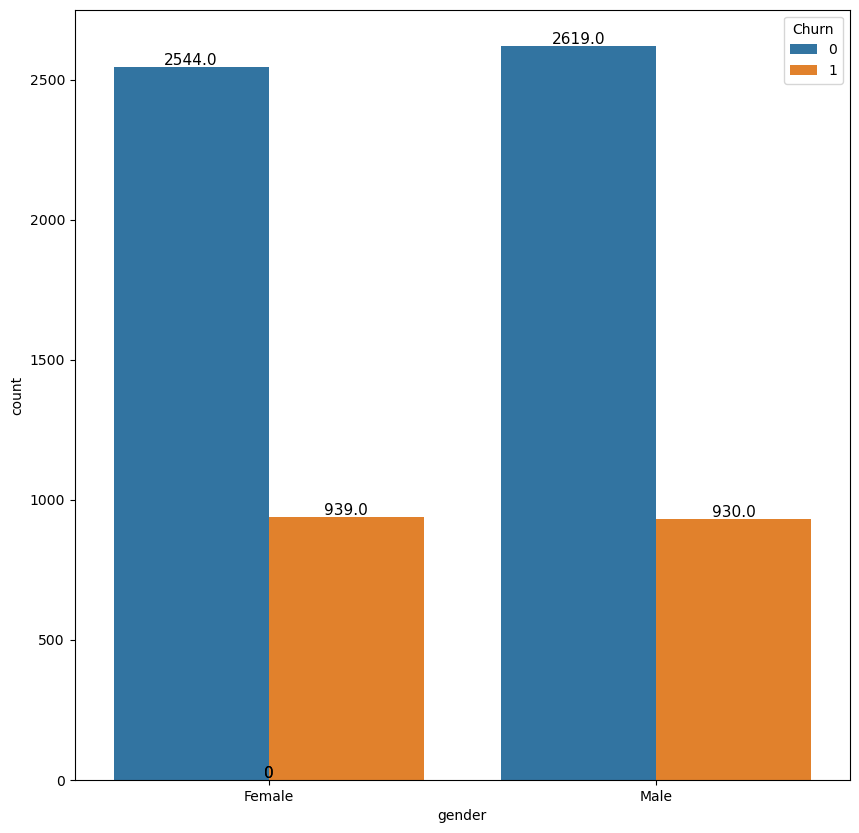

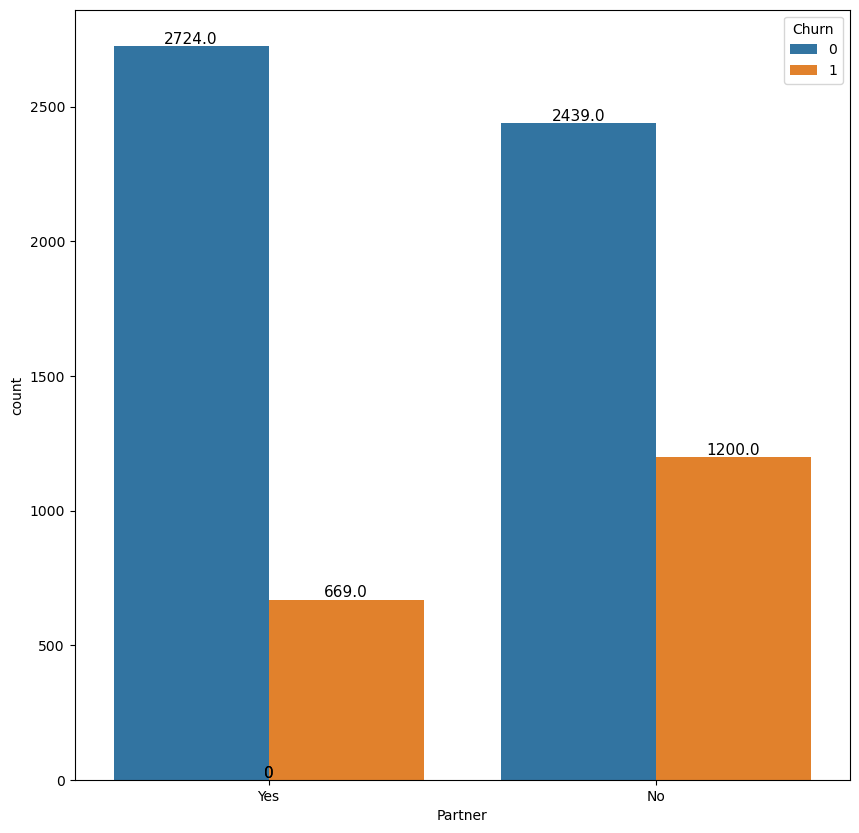

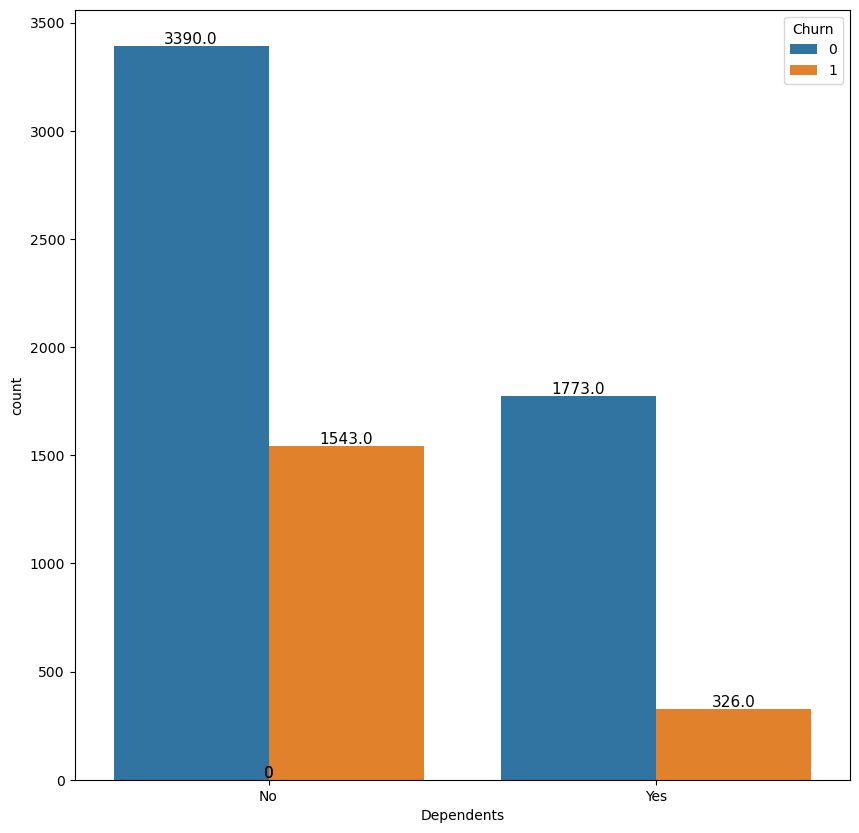

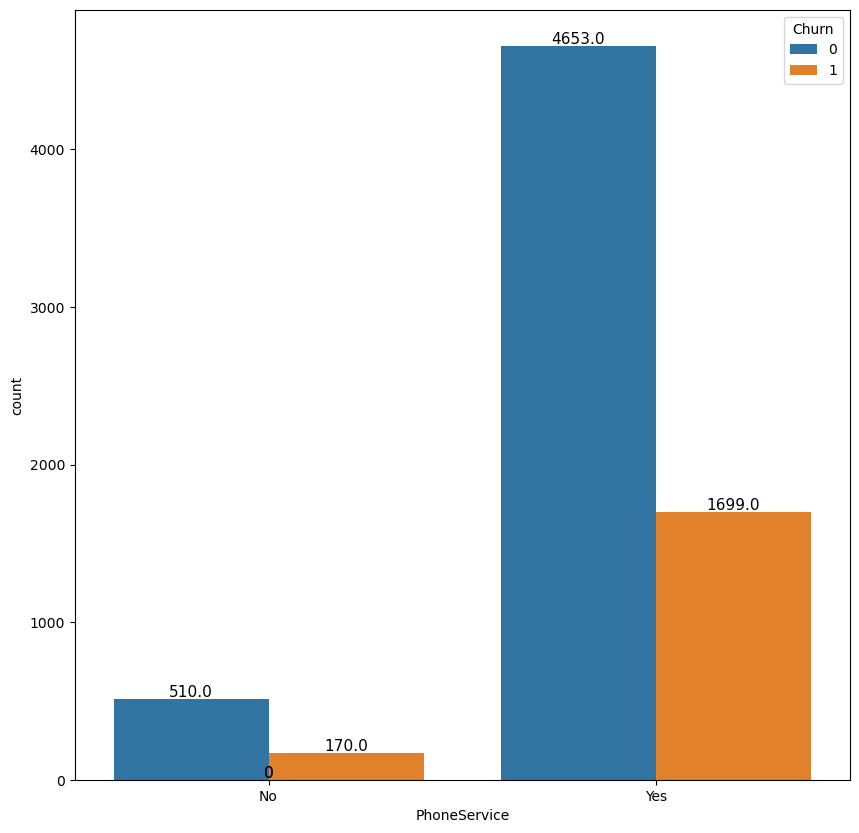

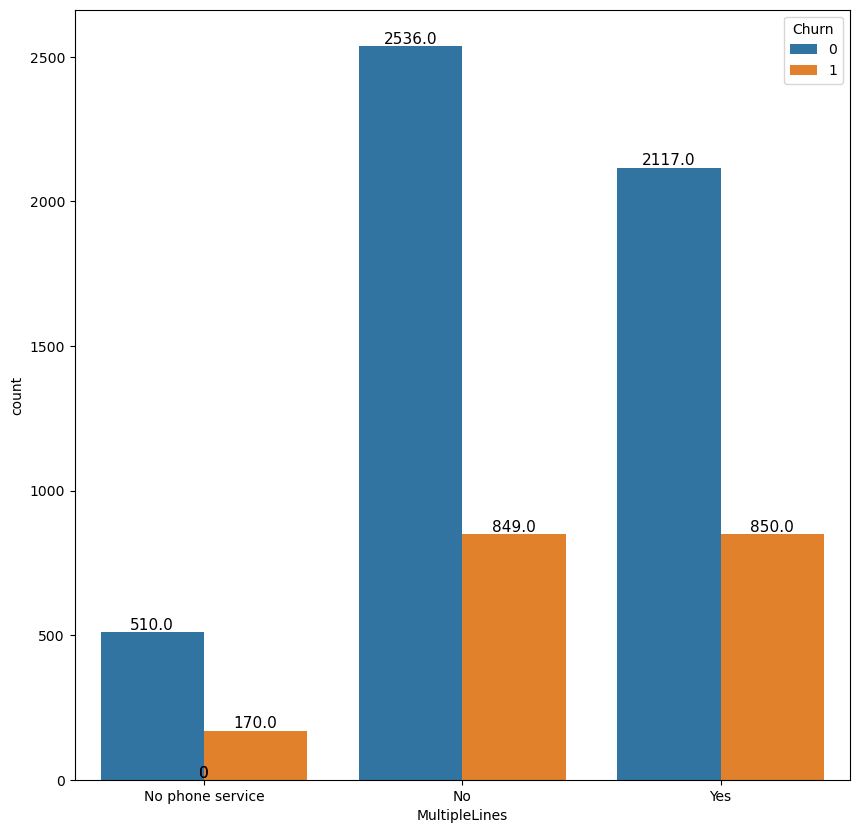

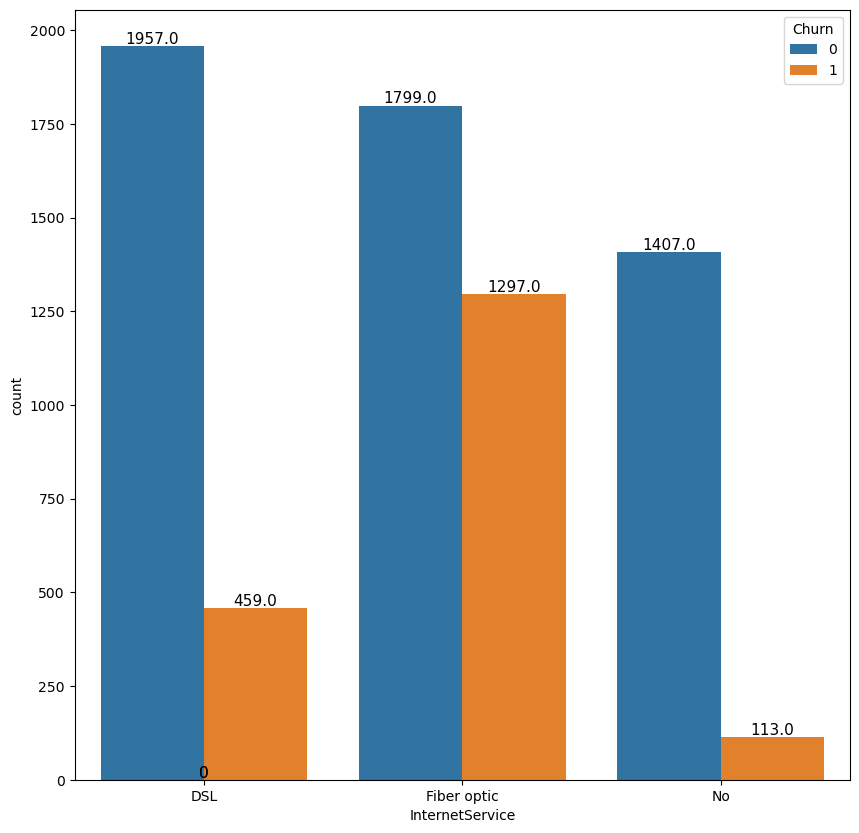

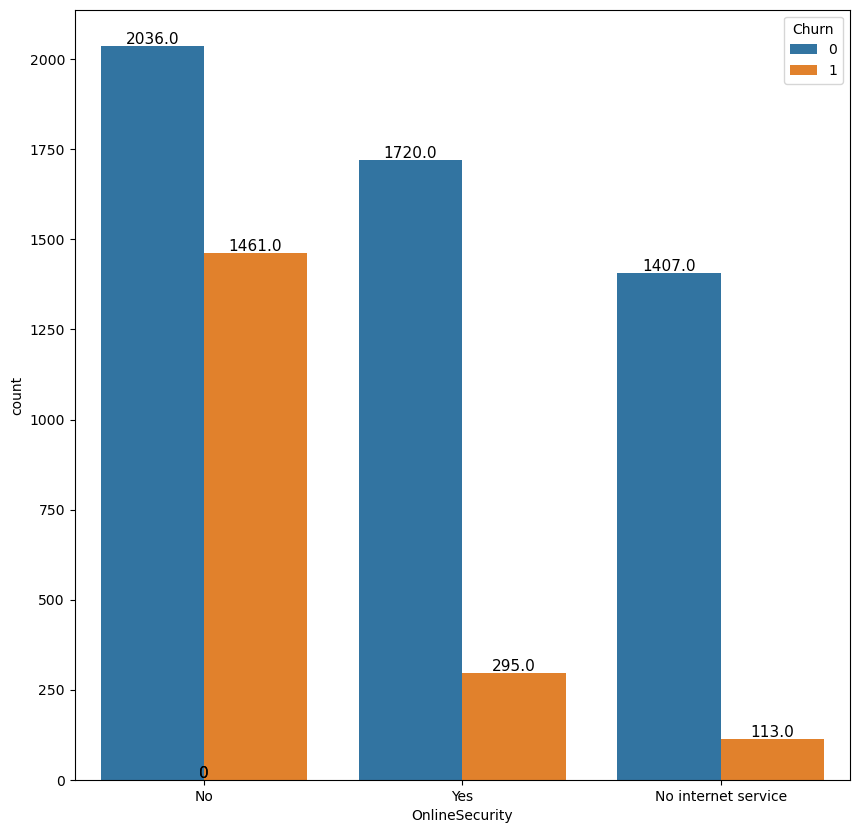

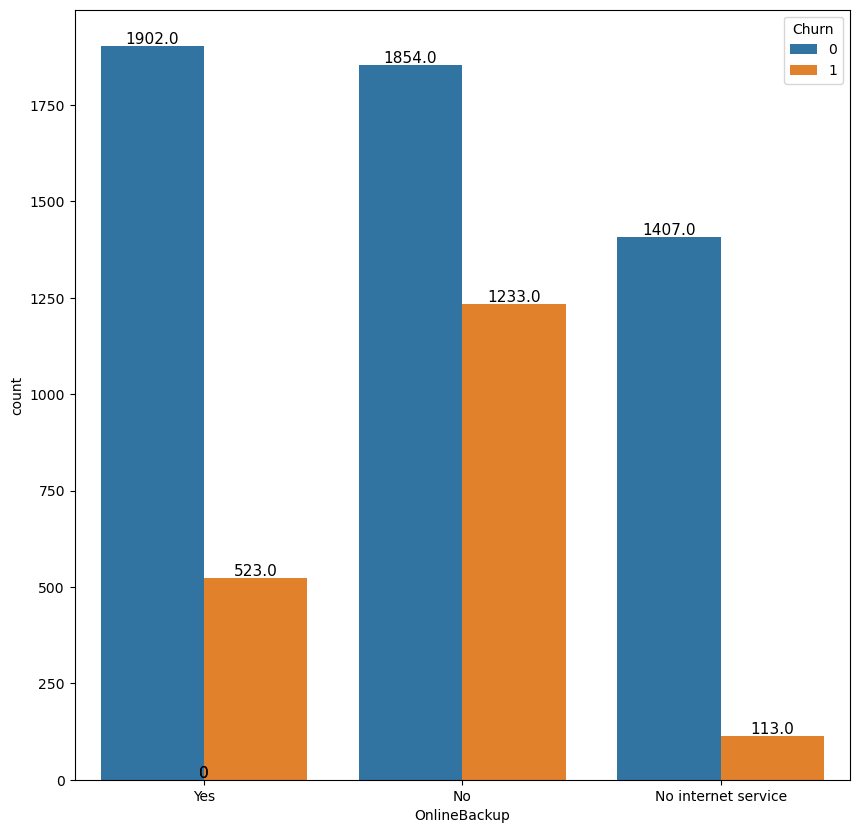

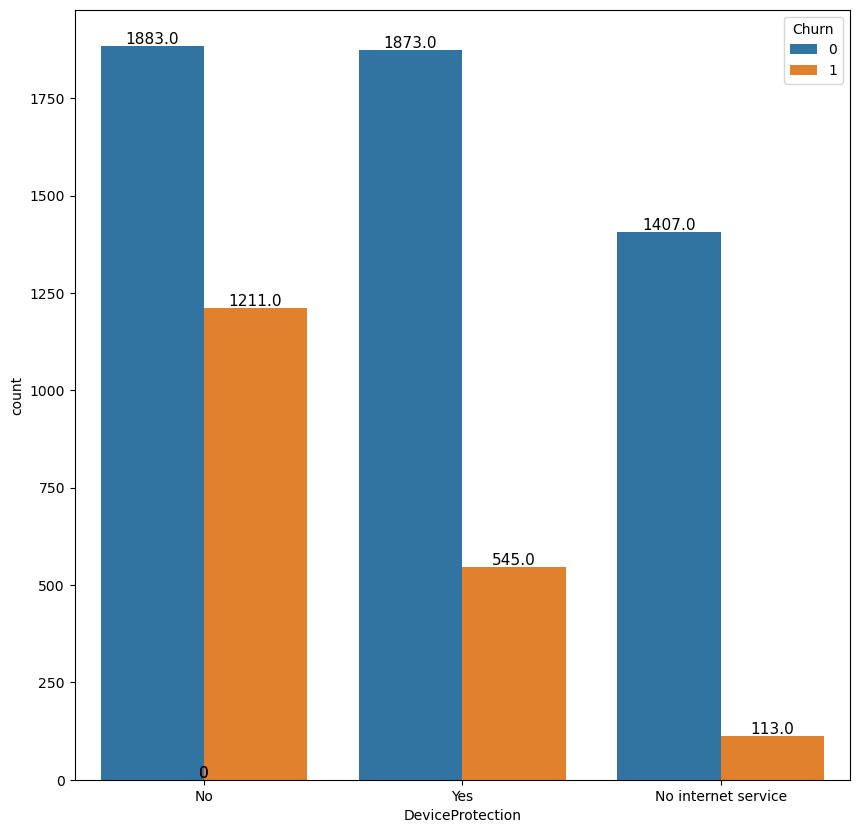

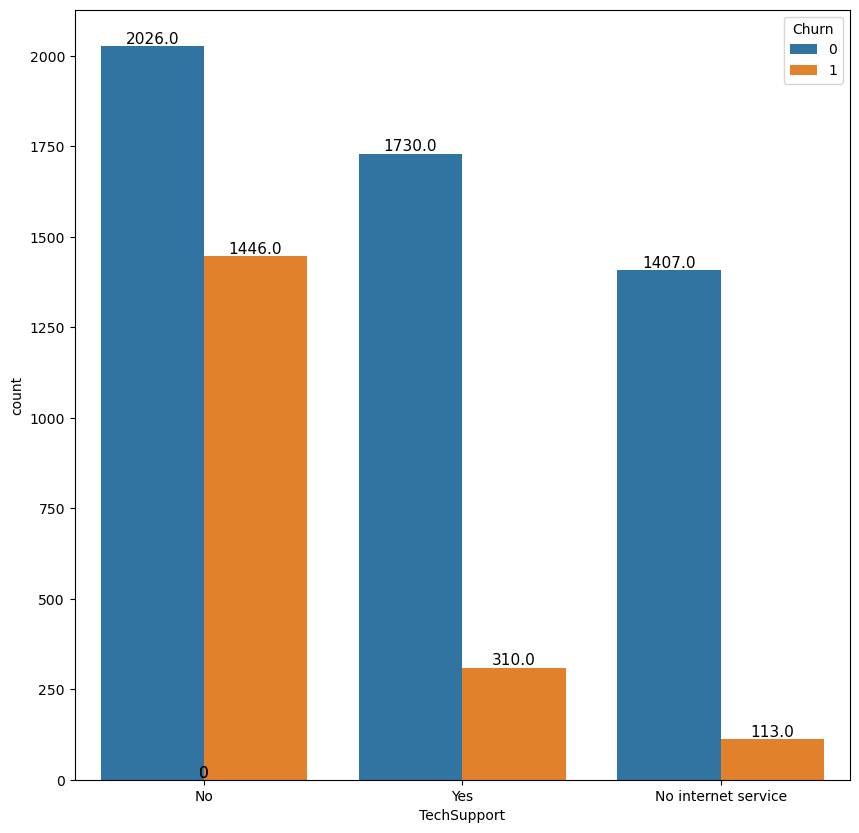

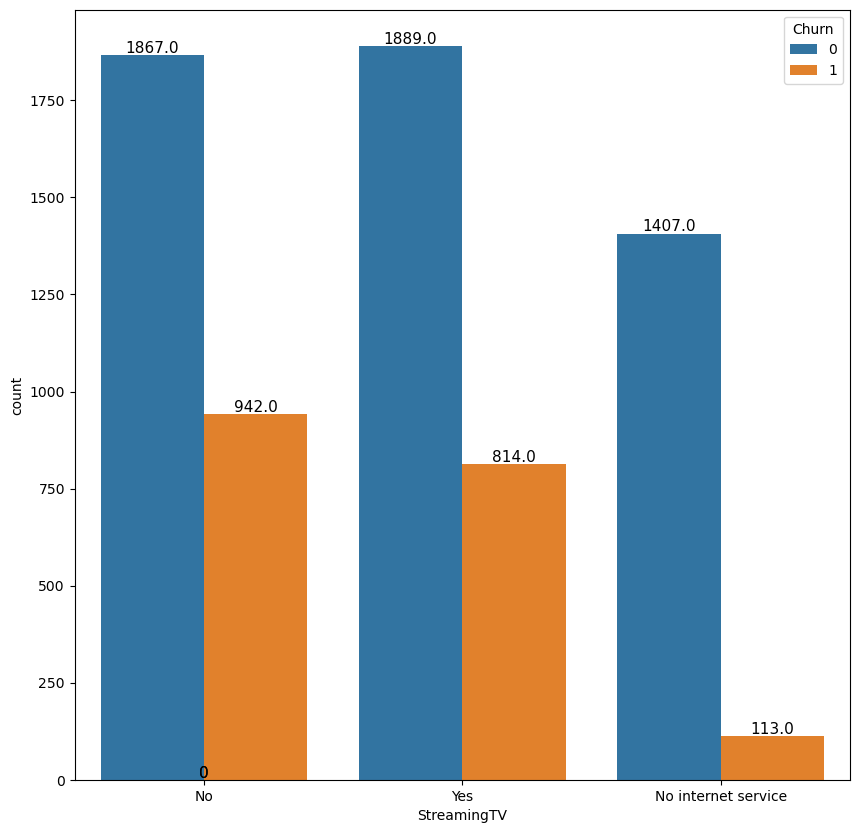

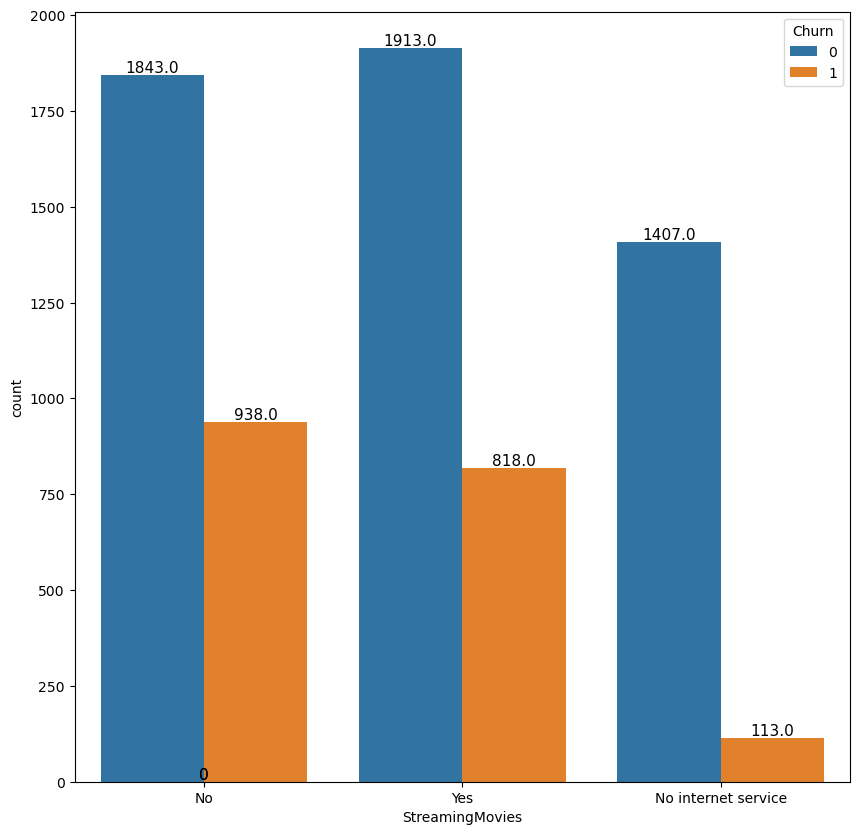

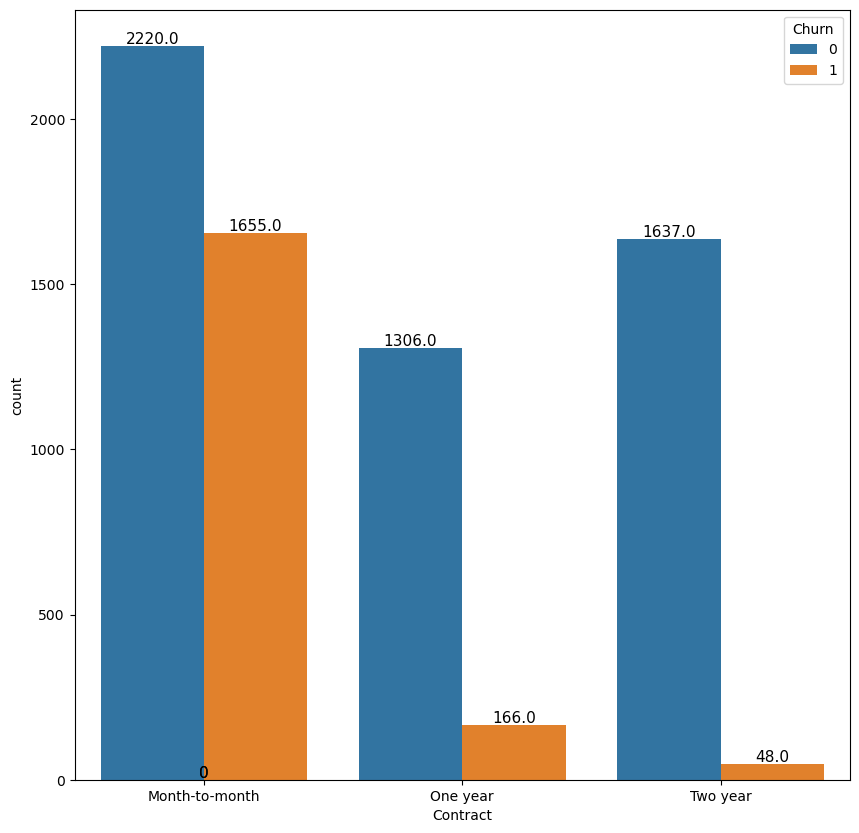

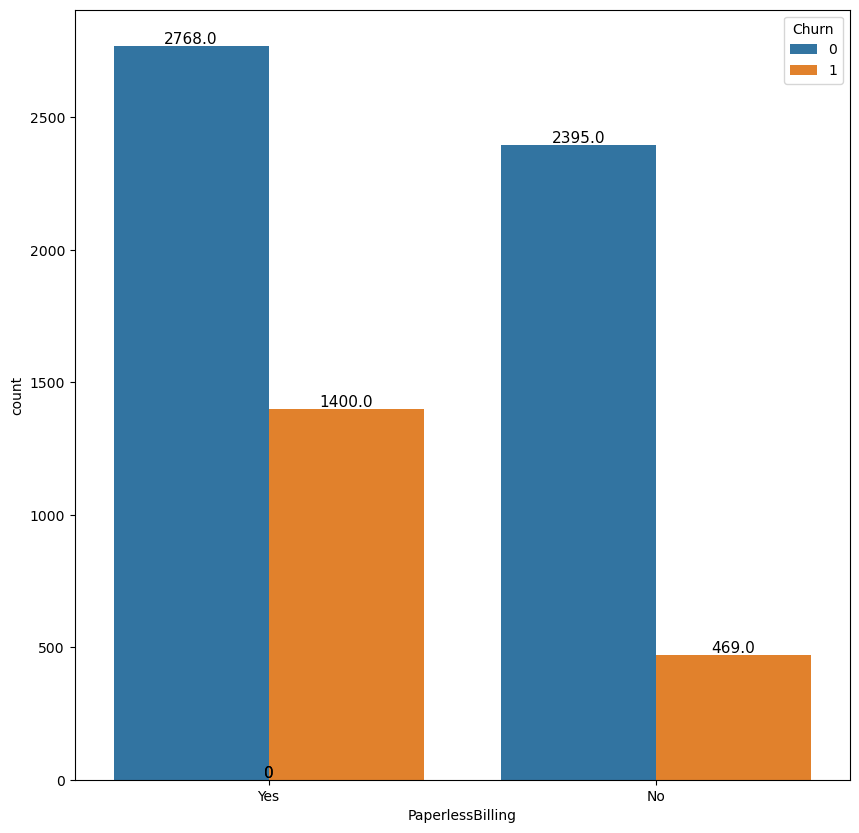

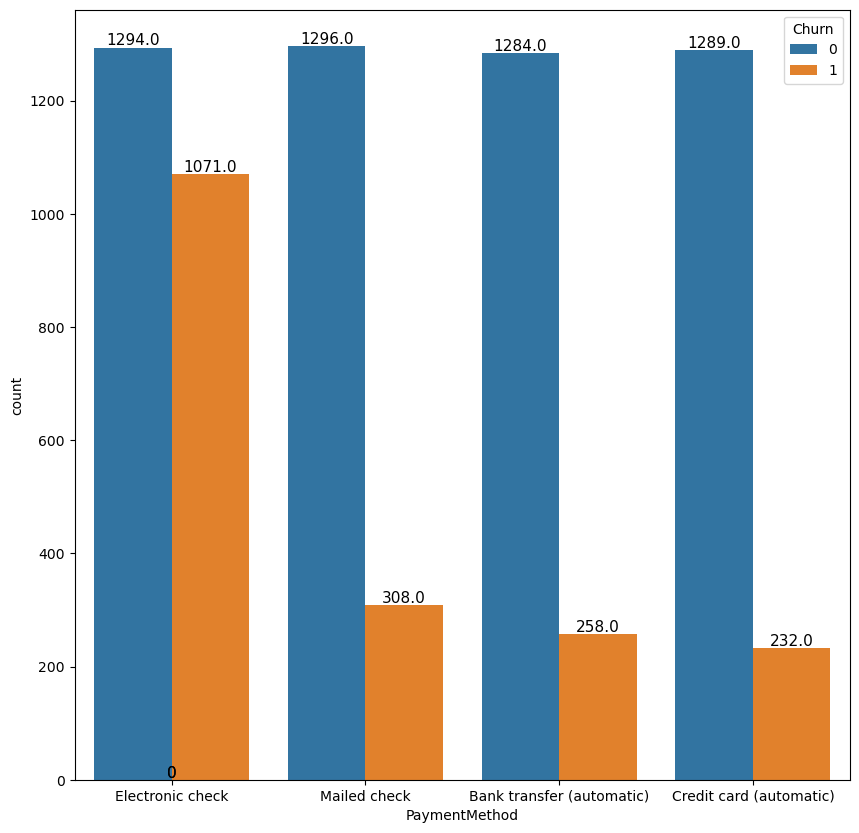

In [50]:
#Graficar todas las variables categoricas con respecto a la variable objetivo Churn
#El uso de _ es para indicar que no nos importa el valor, solo queremos iterar
for _ in column_cat:
    plot_categorial(_)

<Figure size 1000x1000 with 0 Axes>

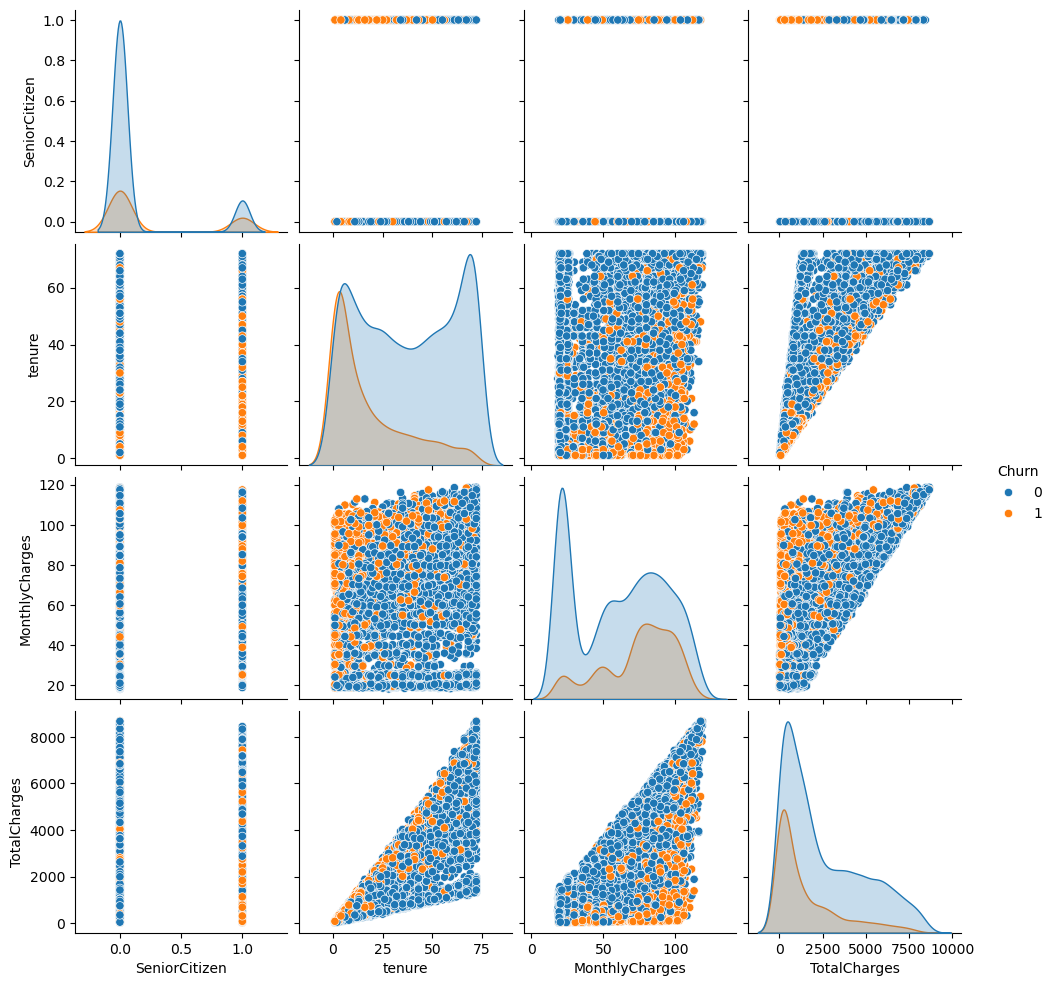

In [ ]:
#Graficar la relacion entre todas las variables numericas con respecto a la variable objetivo Churn
fig = plt.figure(figsize=(10,10))
sns.pairplot(data= df_data, hue='Churn')
plt.show()

## Entrenamiento del modelo de regresión logística binomial

In [51]:
#Separar las variables independientes de la variable dependiente
#El modelo que vamos a crear es para predecir la variable Churn
#Usando una regresion logistica binomial
X = df_data_processing_scaled.drop('Churn',axis=1)
y = df_data_processing_scaled['Churn'].values

In [52]:
#Dividir los datos en entrenamiento y prueba
#Considerando el 30% de los datos para prueba y el 70% para entrenamiento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [54]:
#Crear el modelo de regresion logistica binomial
#la regresion logistica binomial es adecuada para predecir variables binarias
#Una varable binaria es aquella que solo puede tomar dos valores, como 0 y 1
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [57]:
#Evaluar el modelo usando accuracy score
#El valor de accuracy score va de 0 a 1, donde 1 es el mejor valor posible
#Un valor de 0.8 o superior es considerado un buen modelo
#El valor obtenido es de 0.7952 lo que indica que el modelo es bueno pero puede mejorar


from sklearn import metrics
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test ))

0.795260663507109


## Evaluación del modelo

In [60]:
#Obtener las probabilidades de prediccion para cada clase
#La salida es un array con dos columnas, la primera columna es la probabilidad de la clase 0
#y la segunda columna es la probabilidad de la clase 1

model.predict_proba(X_test)

array([[0.99026199, 0.00973801],
       [0.86142958, 0.13857042],
       [0.30082845, 0.69917155],
       ...,
       [0.99033443, 0.00966557],
       [0.70163287, 0.29836713],
       [0.82938519, 0.17061481]], shape=(2110, 2))

In [63]:
#Obtener los coeficientes del modelo
#Los coeficientes indican la importancia de cada variable en la prediccion
#Imagina que es una recta en un espacio multidimensional, los coeficientes son las pendientes de esa recta
#Los coeficientes pueden ser positivos o negativos, donde un coeficiente positivo indica que a mayor valor de la variable, 
# mayor probabilidad de que la variable objetivo sea 1
#Un coeficiente negativo indica que a mayor valor de la variable, menor probabilidad de que la variable objetivo sea 1, es decir, 
# mayor probabilidad de que la variable objetivo sea 0

model.coef_

array([[ 0.21579901, -3.10526247, -0.03615205,  1.19787945, -0.06068636,
        -0.08412597, -0.1339601 , -0.01085223,  0.05598249, -0.20079482,
         0.0412991 , -0.18611143, -0.19572581,  0.0412991 ,  0.00961438,
        -0.44754058,  0.45183569, -0.14910744,  0.19867747, -0.14910744,
        -0.19438235,  0.04183902, -0.14910744, -0.0375439 ,  0.01418609,
        -0.14910744, -0.00989098,  0.17932175, -0.14910744, -0.17502664,
        -0.12417623, -0.14910744,  0.12847134, -0.12628893, -0.14910744,
         0.13058405,  0.70330219, -0.13506516, -0.71304936, -0.17551223,
         0.03069989, -0.03237652, -0.19025467,  0.18520842, -0.10738956]])

In [65]:
#Obtener los nombres de las variables
#A cada nombre de variable corresponde con el coeficiente en la misma posicion

model.feature_names_in_

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two y

Axes(0.125,0.11;0.775x0.77)


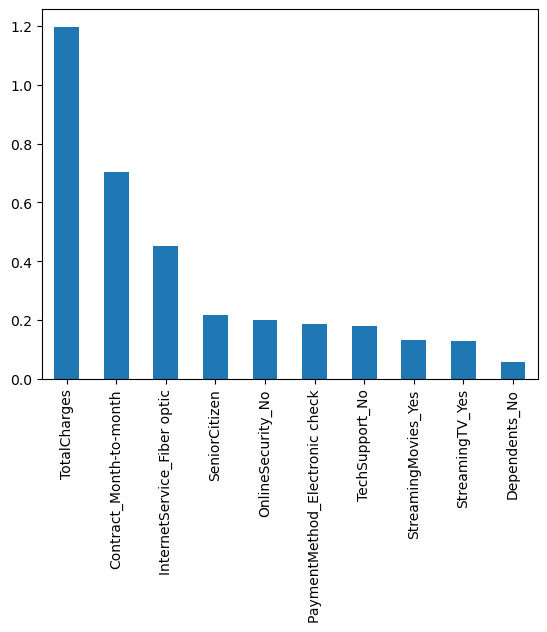

In [ ]:
#Graficar los coeficientes del modelo
#Los coeficientes indican la importancia de cada variable en la prediccion
#Esta prediccion es para la clase 1, es decir, la probabilidad de que la variable objetivo sea 1
weights = pd.Series(model.coef_[0],
                    index=X.columns.values) 
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


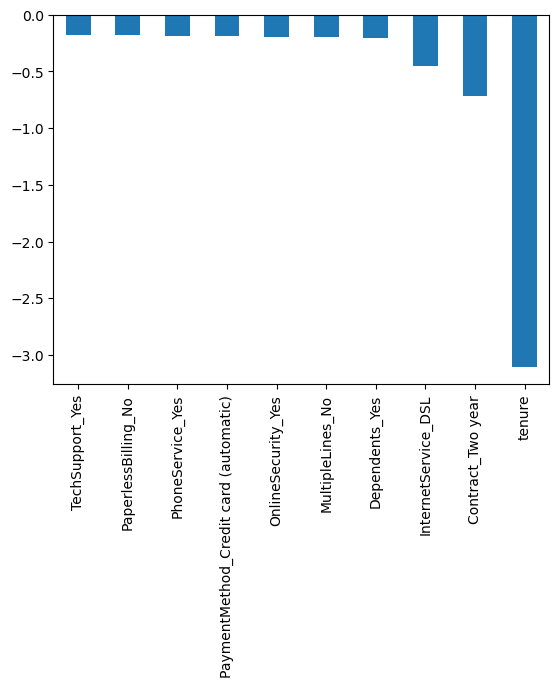

In [67]:
#Graficar las 10 variables con menor importancia en la prediccion
#Los coeficientes negativos indican que a mayor valor de la variable, menor probabilidad de que la variable objetivo sea 1
#es decir, mayor probabilidad de que la variable objetivo sea 0
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

In [66]:
#Crear la matriz de confusion para evaluar el modelo
#La matriz de confusion muestra el numero de aciertos y errores del modelo
#En una matriz de confusion para un modelo binario, hay 4 posibles resultados:
#Verdaderos positivos (TP): El modelo predice 1 y la realidad es 1
#Falsos positivos (FP): El modelo predice 1 y la realidad es 0
#Verdaderos negativos (TN): El modelo predice 0 y la realidad es 0
#Falsos negativos (FN): El modelo predice 0 y la realidad es 1
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 1100x1100 with 0 Axes>

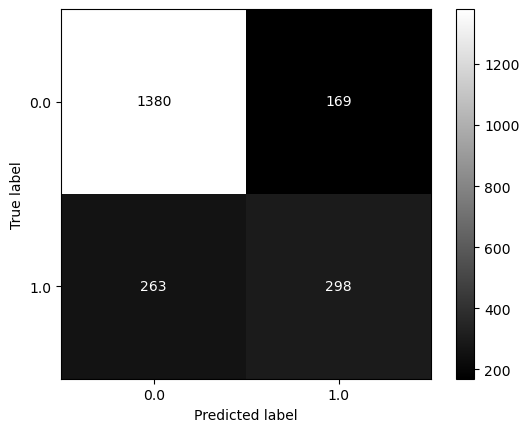

In [ ]:
#Graficar la matriz de confusion
#Una matriz de confusion perfecta es aquella donde todos los valores estan en la diagonal principal
#y todos los demas valores son 0

fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()